In [1]:
import pandas as pd
from keras.utils import to_categorical
import numpy as np

labels = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/activity_labels.txt", header=None, sep="\s+")

X_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt", header=None, sep="\s+")
y_train = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt", header=None)
X_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt", header=None, sep="\s+")
y_test_val = pd.read_csv("../Dataset/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt", header=None)

X_test = X_test_val[0:round(0.9*X_test_val.shape[0])] 
X_val = X_test_val[round(0.9*X_test_val.shape[0]):] 
y_test = y_test_val[0:round(0.9*y_test_val.shape[0])] 
y_val = y_test_val[round(0.9*y_test_val.shape[0]):] 

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
y_train = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
y_val = to_categorical(y_val)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, labels.shape

((7352, 1, 561), (7352, 7), (2652, 1, 561), (2652, 1), (6, 2))

In [2]:
from keras import Sequential
from keras.layers import Bidirectional, LSTM, Dense, Dropout
import keras

modelo = Sequential()
modelo.add(Bidirectional(LSTM(64, return_sequences=True)))
modelo.add(Dropout(0.5))
modelo.add(Bidirectional(LSTM(64)))
modelo.add(Dropout(0.5))
modelo.add(Dense(7, activation="sigmoid"))

modelo.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", "Precision", "Recall"])

In [3]:
historico = modelo.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/20
736/736 [==============================] - 20s 12ms/step - loss: 0.1958 - accuracy: 0.6934 - precision: 0.7626 - recall: 0.5728 - val_loss: 0.0743 - val_accuracy: 0.9763 - val_precision: 0.9754 - val_recall: 0.9424
Epoch 2/20
736/736 [==============================] - 7s 10ms/step - loss: 0.0891 - accuracy: 0.8848 - precision: 0.8758 - recall: 0.8546 - val_loss: 0.0273 - val_accuracy: 0.9831 - val_precision: 0.9896 - val_recall: 0.9695
Epoch 3/20
736/736 [==============================] - 9s 12ms/step - loss: 0.0674 - accuracy: 0.9150 - precision: 0.9121 - recall: 0.9023 - val_loss: 0.0149 - val_accuracy: 0.9898 - val_precision: 0.9966 - val_recall: 0.9864
Epoch 4/20
736/736 [==============================] - 10s 13ms/step - loss: 0.0499 - accuracy: 0.9376 - precision: 0.9340 - recall: 0.9317 - val_loss: 0.0098 - val_accuracy: 0.9966 - val_precision: 0.9966 - val_recall: 0.9932
Epoch 5/20
736/736 [==============================] - 10s 13ms/step - loss: 0.0478 - accuracy: 0.9

In [4]:
_, precisao, precision, recall = modelo.evaluate(X_test, y_test_cat)
f1_score = (2 * precision * recall) / (precision + recall)
print(f"Precisão do modelo: {precisao*100} %")
print(f"Precision do modelo: {precision*100} %")
print(f"Recall do modelo: {recall*100} %")
print(f"F1-Score do modelo: {f1_score*100} %")

83/83 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9374 - precision: 0.9363 - recall: 0.9367
Precisão do modelo: 93.74057054519653 %
Precision do modelo: 93.62985491752625 %
Recall do modelo: 93.66515874862671 %
F1-Score do modelo: 93.64750350581093 %


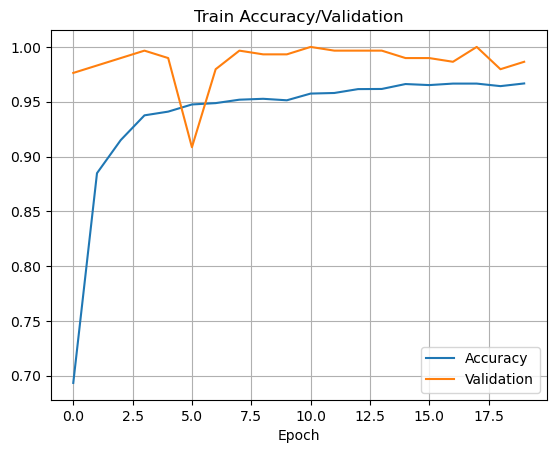

In [5]:
import matplotlib.pyplot as plt
import os

os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE";

plt.plot(historico.history["accuracy"])
plt.plot(historico.history["val_accuracy"])
plt.grid()
plt.title("Train Accuracy/Validation")
plt.legend(["Accuracy", "Validation"])
plt.xlabel("Epoch")
plt.savefig("./images/BiLSTM - Train Accuracy_Validation.pdf")

83/83 [==============================] - 2s 5ms/step


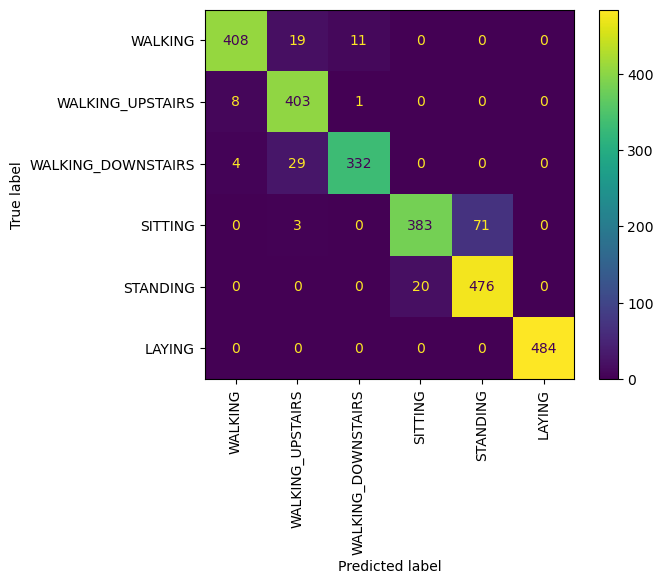

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_previsto = modelo.predict(X_test)
y_previsto = [np.argmax(y) for y in y_previsto]

cm = confusion_matrix(y_test, y_previsto)
display = ConfusionMatrixDisplay(cm, display_labels=labels[1])
display.plot(xticks_rotation="vertical")
display.figure_.savefig("./images/BiLSTM - Confusion Matrix.pdf", bbox_inches="tight")